In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
particles = ['electron','zee','jets','mb','electron_mb','zee_mb','jets_mb']
steps = ['generation', 'simulation','digitalization','reconstruction']
meanDict ={step: list() for step in steps}
stdDict = {step: list() for step in steps}

In [3]:
for particle in particles:
    data = np.load('/home/juan/lorenzetti/tempo/login/'+particle+'.npy',allow_pickle='TRUE').item()
    for step in steps:
        eventValue = list()
        # if not data[step]: data[step] = [0.001 for i in range(10)]
        for value in data[step]:
            eventValue.append((value/10))
        meanDict[step].append(np.mean(eventValue))
        # stdDict[step].append(np.std(eventValue)

/home/juan/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/juan/.local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
normDict = {step: list() for step in steps}
for idx, particle in enumerate(particles):
    for step in steps:
        if idx > 3:
            normDict[step].append(meanDict[step][idx]/meanDict['digitalization'][idx])
        else:
            normDict[step].append(meanDict[step][idx]/meanDict['simulation'][idx])

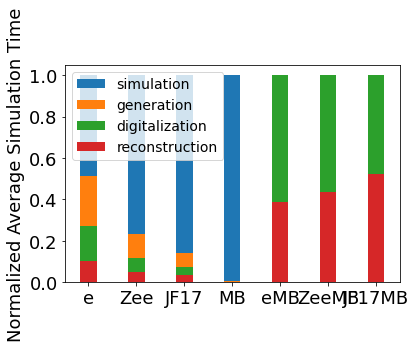

In [5]:
fig, ax = plt.subplots()
steps = ['simulation','generation','digitalization','reconstruction']
particles = ['e', 'Zee', 'JF17', 'MB', 'eMB','ZeeMB','JF17MB']
for step in steps:
    # ax.bar(particles, meanDict[step], width=0.35, yerr=stdDict[step], label=step)
    ax.bar(particles, normDict[step], width=0.35, label=step)

ax.set_ylabel('Normalized Average Simulation Time',fontsize=18)
ax.tick_params(axis='x',labelsize=18)
ax.legend()
plt.legend(prop={'size': 14})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()